In [70]:
#forward propogation
#2 hidden layers assumed
#with two elements in every layer except final output layer
#bias term will be added in every layer except final output layer
#layer 1-2
theta1=np.random.rand(2,3)
x1=df.ix[:,0:3]
a1=x1.transpose()
z2=theta1.dot(a1)
gz2=1.0/(1+np.exp(-1*z2))



In [71]:
import pandas as pd
import numpy as np
import os
df=pd.read_csv('/home/ishaan/Machine-Learning/datasets/synth.tr.csv')
del df['Unnamed: 0']
#add bias term to dataset
m=df.shape[0]
df['bias'] = pd.Series(np.ones(m), index=df.index)
cols = list(df)
cols.insert(0, cols.pop(cols.index('bias')))
df = df.ix[:, cols]
df = df.sample(frac=1).reset_index(drop=True)
print df.head(10)

   bias        xs        ys  yc
0   1.0  0.203923  0.916415   1
1   1.0  0.320830  0.327213   0
2   1.0 -0.252046  0.673583   1
3   1.0  0.318845  0.845177   1
4   1.0 -0.356577  0.637097   1
5   1.0  0.438970  0.628172   1
6   1.0 -0.531727  0.619343   1
7   1.0 -0.679425  0.307539   0
8   1.0 -0.409036  0.742304   1
9   1.0  0.388273  0.449771   1


In [72]:
#layer 2-3
bias = [1 for i in range(1,251)]
a2=np.vstack([bias,gz2])
theta2=np.random.rand(2,3)
z3=theta2.dot(a2)
gz3=1.0/(1+np.exp(-1*z3))
print gz3
#layer 3-4
bias = [1 for i in range(1,251)]
a3=np.vstack([bias,gz2])
theta3=np.random.rand(1,3)
z4=theta3.dot(a3)
gz4=1.0/(1+np.exp(-1*z4))
print gz4


[[ 0.78320902  0.77370729  0.77198585  0.78743462  0.77419075  0.77900338
   0.75610472  0.77885393  0.7823167   0.76076897  0.77798198  0.78042964
   0.77234746  0.78644208  0.78176576  0.77866754  0.77788867  0.75840916
   0.76351634  0.77859674  0.77472414  0.75422399  0.77798887  0.77876601
   0.77953771  0.77693022  0.77936178  0.78473035  0.78246319  0.77323514
   0.77308489  0.7820395   0.76532228  0.78112611  0.75644601  0.7625661
   0.78092945  0.78472548  0.75996945  0.78737569  0.78768819  0.78899866
   0.78204401  0.78151832  0.78033943  0.75726624  0.76926624  0.77944534
   0.77749607  0.7706357   0.76328029  0.77501988  0.77536561  0.75579256
   0.7728533   0.7686648   0.78794235  0.77759741  0.78160159  0.78717381
   0.77309128  0.7789383   0.77830487  0.78821368  0.78210724  0.78845744
   0.75628313  0.74891305  0.7835539   0.78818474  0.76490524  0.75361255
   0.76872388  0.77508113  0.77975661  0.77302288  0.77347066  0.77668508
   0.78252103  0.76011764  0.75739485  

In [73]:
#backward propogation
#layer 3-4
error4=np.mat(gz4[0,:]-df.ix[:,3])
#layer 2-3
gdashz3=a3*(1-a3)
error3=np.multiply(theta3.transpose().dot(error4),gdashz3)
#layer 1-2
gdashz2=a2*(1-a2)
error2=np.multiply(np.vstack([[0 for i in range(1,251)],theta2.dot(error3)]),gdashz2)

In [74]:
#updating thetas
delta3 = [[0 for i in range(1,4)]]
delta3=delta3+error4.dot(a3.transpose())
D3=delta3/250
delta2 = [[0 for i in range(1,4)]]
delta2=delta2+error3.dot(a2.transpose())
D2=delta2/250
delta1 = [[0 for i in range(1,4)]]
delta1=delta1+error2.dot(a1.transpose())
D1=delta1/250

In [75]:
D1=D1[1:,:]
D2=D2[1:,:]
D3=np.asarray(D3)
D2=np.asarray(D2)
D1=np.asarray(D1)
print D1
print D2

[[ 0.00649803 -0.00151636  0.00274747]
 [ 0.00198119 -0.00039553  0.00086315]]
[[ 0.01133149  0.00872766  0.00859201]
 [ 0.03538925  0.02770749  0.02699125]]


In [76]:
for i in range(0,1000):
        #backward propogation
    #layer 3-4
    error4=np.mat(gz4[0,:]-df.ix[:,3])
    #layer 2-3
    gdashz3=a3*(1-a3)
    error3=np.multiply(D3.transpose().dot(error4),gdashz3)
    #layer 1-2
    gdashz2=a2*(1-a2)
    error2=np.multiply(np.vstack([[0 for i in range(1,251)],D2.dot(error3)]),gdashz2)
    #updating thetas
    delta3 = [[0 for i in range(1,4)]]
    delta3=delta3+error4.dot(a3.transpose())
    D3=delta3/250
    delta2 = [[0 for i in range(1,4)]]
    delta2=delta2+error3.dot(a2.transpose())
    D2=delta2/250
    delta1 = [[0 for i in range(1,4)]]
    delta1=delta1+error2.dot(a1.transpose())
    D1=delta1/250
    D1=D1[1:,:]
    D2=D2[1:,:]
    D3=np.asarray(D3)
    D2=np.asarray(D2)
    D1=np.asarray(D1)

In [77]:
#test set error
dat=pd.read_csv('/home/ishaan/Machine-Learning/datasets/synth.te.csv')
del dat['Unnamed: 0']
#add bias term to dataset
m=dat.shape[0]
dat['bias'] = pd.Series(np.ones(m), index=dat.index)
cols = list(dat)
cols.insert(0, cols.pop(cols.index('bias')))
dat = dat.ix[:, cols]
dat = dat.sample(frac=1).reset_index(drop=True)
dat=dat.tail(250)


In [66]:
tx1=dat.ix[:,0:3]
ta1=tx1.transpose()
tz2=D1.dot(ta1)
tgz2=1.0/(1+np.exp(-1*tz2))
#layer 2-3
tbias = [1 for i in range(1,251)]
ta2=np.vstack([tbias,tgz2])
tz3=D2.dot(ta2)
tgz3=1.0/(1+np.exp(-1*tz3))
#layer 3-4
tbias = [1 for i in range(1,251)]
ta3=np.vstack([tbias,tgz2])
tz4=D3.dot(ta3)
tgz4=1.0/(1+np.exp(-1*tz4))
print tgz4

[[ 0.56048307  0.56048307  0.56048306  0.56048307  0.56048306  0.56048307
   0.56048307  0.56048307  0.56048307  0.56048307  0.56048307  0.56048306
   0.56048307  0.56048306  0.56048307  0.56048306  0.56048306  0.56048306
   0.56048307  0.56048307  0.56048307  0.56048307  0.56048307  0.56048307
   0.56048307  0.56048307  0.56048307  0.56048306  0.56048306  0.56048307
   0.56048306  0.56048307  0.56048307  0.56048307  0.56048307  0.56048306
   0.56048307  0.56048306  0.56048307  0.56048307  0.56048307  0.56048307
   0.56048306  0.56048306  0.56048306  0.56048307  0.56048307  0.56048306
   0.56048307  0.56048307  0.56048306  0.56048307  0.56048307  0.56048307
   0.56048306  0.56048307  0.56048306  0.56048306  0.56048307  0.56048306
   0.56048306  0.56048307  0.56048307  0.56048307  0.56048307  0.56048307
   0.56048307  0.56048307  0.56048307  0.56048307  0.56048307  0.56048306
   0.56048306  0.56048306  0.56048307  0.56048307  0.56048307  0.56048307
   0.56048307  0.56048307  0.56048307 

In [78]:
prediction=np.reshape(tgz4, (250, 1)) 

In [79]:
import scipy.sparse as sparse
dat['prediction'] = prediction
print dat

     bias        xs        ys  yc  prediction
750   1.0  0.533326  0.591671   0    0.560483
751   1.0 -0.537049  0.307417   0    0.560483
752   1.0  0.480078  0.374810   0    0.560483
753   1.0  0.549912  0.472172   1    0.560483
754   1.0 -0.921420 -0.069844   0    0.560483
755   1.0 -0.676334  1.064999   1    0.560483
756   1.0 -0.762727  0.890353   1    0.560483
757   1.0 -0.723018  0.256183   0    0.560483
758   1.0  0.175106  0.609394   1    0.560483
759   1.0  0.762041  0.573218   1    0.560483
760   1.0  0.414757  0.893307   1    0.560483
761   1.0  0.182362  0.298521   0    0.560483
762   1.0 -0.799795  0.309431   0    0.560483
763   1.0  0.684761  0.892746   1    0.560483
764   1.0  0.463003  0.972726   1    0.560483
765   1.0  0.003602  0.804353   1    0.560483
766   1.0 -0.894120  0.157170   0    0.560483
767   1.0  0.290939  0.858417   1    0.560483
768   1.0  0.444428  0.747146   1    0.560483
769   1.0 -1.011976  0.344692   0    0.560483
770   1.0  0.454067  0.332583   0 

In [80]:
((len(dat[(dat['prediction']>=0.5) & (dat['yc']==1)])+len(dat[(dat['prediction']<0.5) & (dat['yc']==0)]))/250.0)*100

54.800000000000004

In [81]:
print "accuracy of 55% on test set.lower accuracy because regularization not done on for theta(i,j),j>1"

accuracy of 55% on test set.lower accuracy because regularization not done on for theta(i,j),j>1


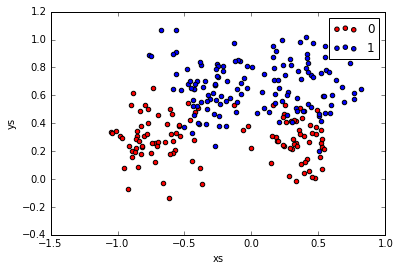

In [82]:
#plot test set
import matplotlib.pyplot as plt
from random import *
%matplotlib inline
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = dat.groupby('yc')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='xs', y='ys', label=key, color=colors[key])
plt.show()

In [83]:
print "certainly non linear decision boundary"

certainly non linear decision boundary


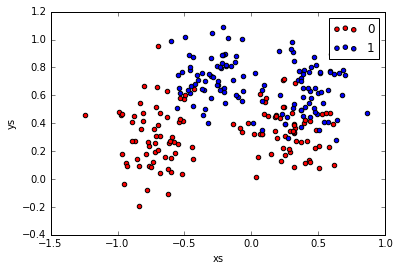

In [84]:
#plot train set
import matplotlib.pyplot as plt
from random import *
%matplotlib inline
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = df.groupby('yc')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='xs', y='ys', label=key, color=colors[key])
plt.show()